# Example Constraint Notebook

This notebook describes how to implement constraints on the environment aid development of safe-RL algorithms.


In [7]:
from pcgym import make_env
import numpy as np 
from stable_baselines3 import PPO

First we define the following two constaints on the Temperature state
$T \geq 319K$ and $T \leq 331K$  

In [8]:
cons = {
    'T': [319,331]
}

cons_type = {
    'T':['>=','<=']
}


In [9]:
T = 26
nsteps = 100
SP = {
    'Ca': [0.85 for i in range(int(nsteps/2))] + [0.9 for i in range(int(nsteps/2))],
}

In [10]:
# Continuous box action space
action_space = {
    'low': np.array([295]),
    'high':np.array([302]) 
}

# Continuous box observation space
observation_space = {
    'low' : np.array([0.7,300,0.8]),
    'high' : np.array([1,350,0.9])  
}

r_scale ={
    'Ca': 1e3 #Reward scale for each state
}
env_params = {
    'N': nsteps, # Number of time steps
    'tsim':T, # Simulation Time
    'SP':SP, # Setpoint
    'o_space' : observation_space, # Observation space
    'a_space' : action_space, # Action space
    'x0': np.array([0.8,330,0.8]), # Initial conditions 
    'model': 'cstr', # Select the model
    'r_scale': r_scale, # Scale the L1 norm used for reward (|x-x_sp|*r_scale)
    'normalise_a': True, # Normalise the actions
    'normalise_o':True, # Normalise the states,
    'noise':True, # Add noise to the states
    'integration_method': 'casadi', # Select the integration method
    'noise_percentage':0.001, # Noise percentage
    'done_on_cons_vio':False,
    'constraints': cons, 
    'cons_type': cons_type,
    'r_penalty': True
}
env = make_env(env_params)

In [11]:
nsteps_learning = 2.5e4
PPO_policy = PPO('MlpPolicy', env, verbose=1,learning_rate=0.001).learn(nsteps_learning)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 99        |
|    ep_rew_mean     | -1.04e+03 |
| time/              |           |
|    fps             | 602       |
|    iterations      | 1         |
|    time_elapsed    | 3         |
|    total_timesteps | 2048      |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 99          |
|    ep_rew_mean          | -1.7e+03    |
| time/                   |             |
|    fps                  | 576         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009868056 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.2         |
|    entro

We can now rollout and plot the policy. Note the constraints on the temperature plot. The `cons_viol` input can be used to display the constraint violations. Try reducing the number of timesteps used to train the policy or tightening the constraints and turning on the constraint violation visulisation!

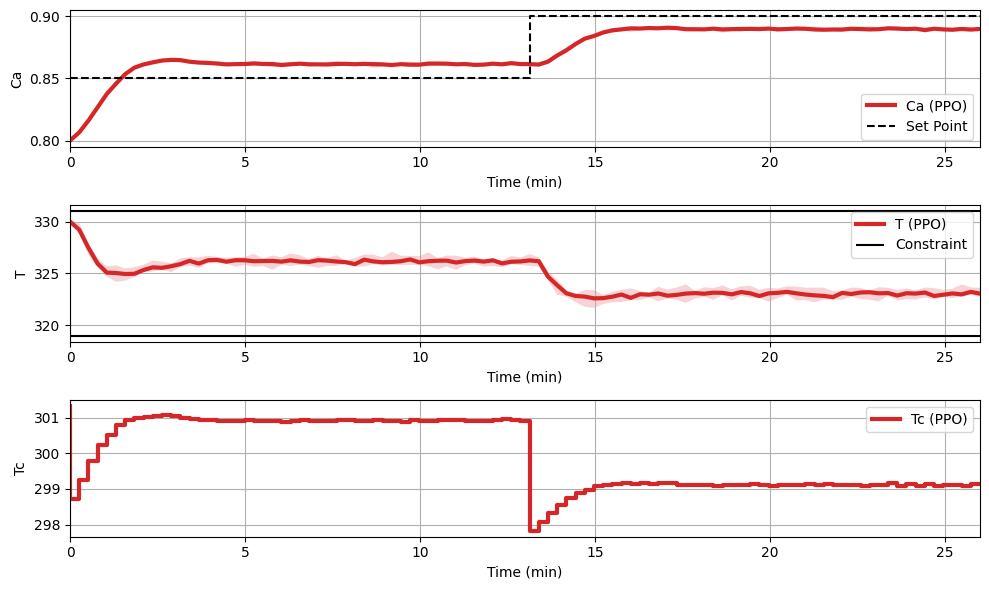

In [12]:
evaluator, data = env.plot_rollout({'PPO': PPO_policy}, reps = 10, cons_viol= False)